# **Decision Trees**


In [0]:
#We first import the basic libraries
#Numpy and Pandas are used for basic functions 
#matplotlib and seaborn are used for plotting graphs and other pictorial represntations 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns 

#skLearn is used for importing pre-defined functions which makes our work eaier
#We import the confusion matrix and the classification report-the final reports that tell us about the accuracy and precision of the trained model
from sklearn.metrics import classification_report, confusion_matrix, f1_score  
from sklearn.model_selection import train_test_split  
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier 

In [0]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
wine=pd.read_csv('/content/drive/My Drive/Red Wine quality.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Now that we have our data and there are 11 features we will plot the graph of each feature vs quality to know the relationship between the features. This will help us understand the important features which ae to be taken in into consideration in our decision tree algorithm and the features which are to discarded as they have very less to no impact on wine quality. 

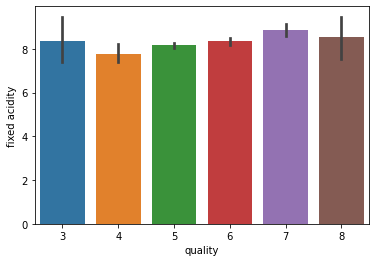

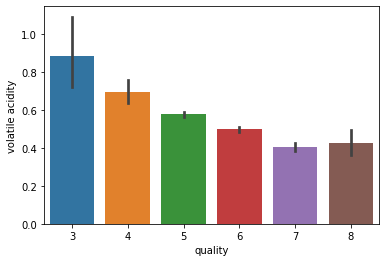

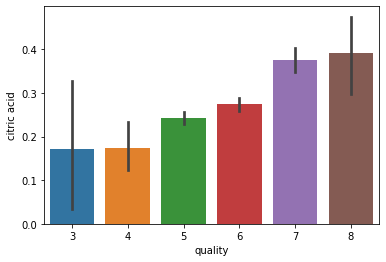

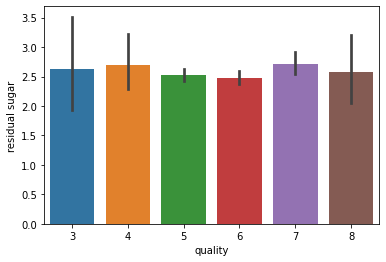

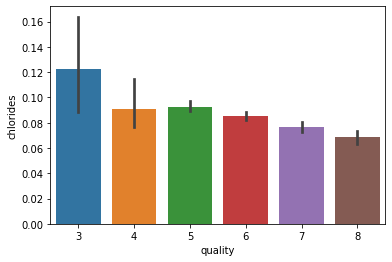

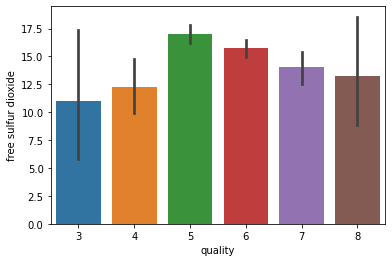

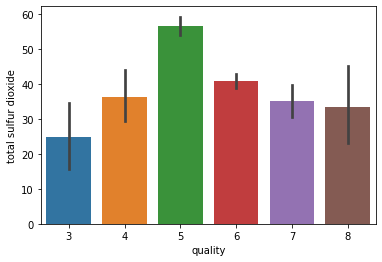

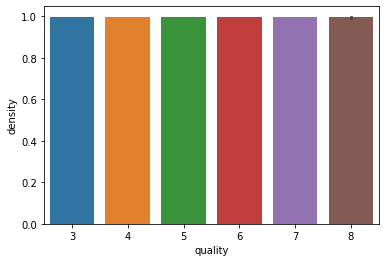

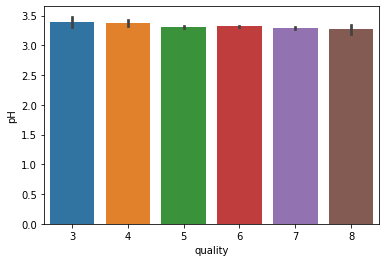

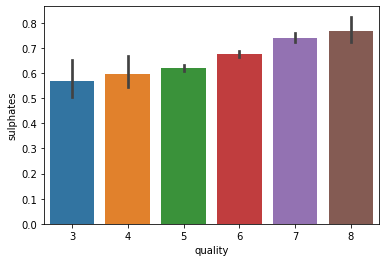

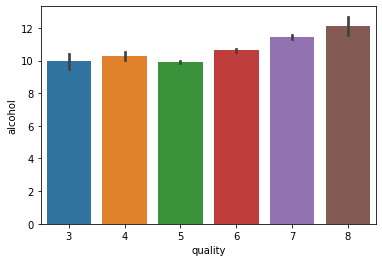

In [0]:
# We plot the bar graph using seaborn library. 

sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'density', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'pH', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
plt.show()
sns.barplot(x = 'quality', y = 'alcohol', data = wine)
plt.show()

What we can infer from the graphs above is that there are only certain paratmeters which decide the quality. Rather these parameters are the ones who influence the wine quality the most. Hence we use these parameters only in our algorithm. We will keep volatile acidity, citric acid, sulphates and alcoholonly as our decision tree parameters

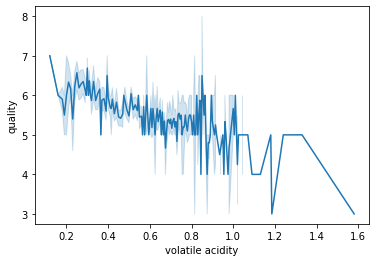

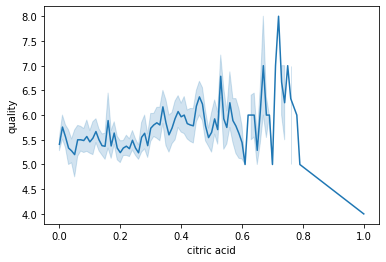

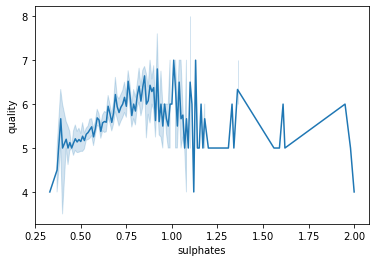

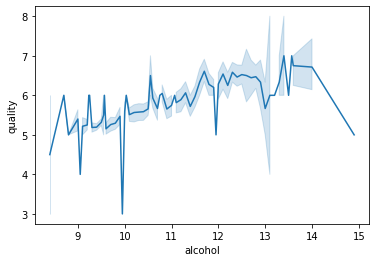

In [0]:
# To better understand our parameters we have plotted the line-graph of the parameters vs the quality
#It gives us intuitin as to how increasing or decreasing the parameter affects our decision of wine quality

sns.lineplot(x ='volatile acidity' , y = 'quality', data = wine)
plt.show()
sns.lineplot(x ='citric acid' , y = 'quality', data = wine)
plt.show()
sns.lineplot(x ='sulphates' , y = 'quality', data = wine)
plt.show()
sns.lineplot(x ='alcohol' , y ='quality', data = wine)
plt.show()

In [0]:
#we drop the remaining parameters

reqd_wine = wine.drop(columns=["fixed acidity","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH"])
reqd_wine.head()

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.70,0.00,0.56,9.4,5
1,0.88,0.00,0.68,9.8,5
2,0.76,0.04,0.65,9.8,5
3,0.28,0.56,0.58,9.8,6
4,0.70,0.00,0.56,9.4,5


In [0]:
# we put the wine quality greater than 5 as good and less than or equal to 5 as bad
reqd_wine["quality"].replace({1:False, 2:False, 3:False,4:False, 5:False, 6:True, 7:True, 8:True, 9:True},inplace=True)
reqd_wine.head()

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.70,0.00,0.56,9.4,False
1,0.88,0.00,0.68,9.8,False
2,0.76,0.04,0.65,9.8,False
3,0.28,0.56,0.58,9.8,True
4,0.70,0.00,0.56,9.4,False


In [0]:
#we just rename our column 
reqd_wine = reqd_wine.rename(columns={"quality":"label"})
reqd_wine

,volatile acidity,citric acid,sulphates,alcohol,label
0,0.700,0.00,0.56,9.4,False
1,0.880,0.00,0.68,9.8,False
2,0.760,0.04,0.65,9.8,False
3,0.280,0.56,0.58,9.8,True
4,0.700,0.00,0.56,9.4,False
...,...,...,...,...,...
1594,0.600,0.08,0.58,10.5,False
1595,0.550,0.10,0.76,11.2,True
1596,0.510,0.13,0.75,11.0,True
1597,0.645,0.12,0.71,10.2,False


In [0]:
#We split our data into two sets of training and testing data 

wine_train = reqd_wine[:1300]
wine_train_x = wine_train.drop(columns='label')
wine_train_y = wine_train['label'] 

wine_test = reqd_wine[1300:]
wine_test_x = wine_test.drop(columns='label')
wine_test_y = wine_test['label']

# y_train = 
# array_wine=wine_train.values
# array_wine[:7]

## Algorithm

## **Using Libraries**

In [0]:
WineTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
WineTree.fit(wine_train_x,wine_train_y)

y_pred = WineTree.predict(wine_test_x)
print('Confusion Matrix is')
print('           Predicted Yes  Predicted No\nActual Yes    ',confusion_matrix(wine_test_y,y_pred)[0][0],"           ",confusion_matrix(wine_test_y,y_pred)[0][1],'\nActual No     ',confusion_matrix(wine_test_y,y_pred)[1][0],"           ",confusion_matrix(wine_test_y,y_pred)[1][1])
print('\n\n\n\nClassifiaction report is as follows')
print(classification_report(wine_test_y,y_pred))

Confusion Matrix is
           Predicted Yes  Predicted No
Actual Yes     91             58 
Actual No      29             121




Classifiaction report is as follows
              precision    recall  f1-score   support

       False       0.76      0.61      0.68       149
        True       0.68      0.81      0.74       150

    accuracy                           0.71       299
   macro avg       0.72      0.71      0.71       299
weighted avg       0.72      0.71      0.71       299

